In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans

data = pd.read_csv("happiness.csv")

main_data = data.drop('Ladder score in Dystopia',
               axis = 1) #after seeing distribution, decided to remove variable as it has one value for all objects

In [ ]:
main_data.head(5)

In [ ]:
subdata=main_data[["Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
subdata 

In [ ]:
rank= pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0,100)).fit_transform(subdata), columns=subdata.columns)
z_scoring= pd.DataFrame(preprocessing.StandardScaler().fit_transform(subdata),columns=subdata.columns)
ranges=(subdata-np.mean(subdata))/(np.max(subdata)-np.min(subdata))
ranges

In [6]:
sets=[z_scoring, ranges]
scatters=np.zeros(2)
scatters

array([0., 0.])

In [7]:
for i in range(len(sets)):
  scatters[i]=sum(sum(sets[i].values**2))
scatters

array([745.        ,  32.41805204])

In [8]:
#SVD
us, ss, vs = list(), list(), list()
for i in sets:
  u, s, v = np.linalg.svd(i)
  us.append(u)
  ss.append(s)
  vs.append(v)
ss

[array([18.70523523, 13.51369469, 10.23106001,  8.44198327,  6.04587133]),
 array([4.08417303, 2.6315909 , 2.05095932, 1.65651976, 1.36448534])]

In [9]:
vs[0][:, 0]

array([-0.53823303,  0.26645214, -0.36110215, -0.26421253, -0.66265032])

In [10]:
vs[0][:, 1]

array([-0.56282271,  0.24253636, -0.00279707, -0.36402884,  0.70134292])

In [11]:
vs[1][:, 0]

array([-0.5612566 ,  0.29327426, -0.32123254, -0.1400196 , -0.69006188])

In [12]:
vs[1][:, 1]

array([-0.64057359,  0.2265776 ,  0.1213914 , -0.35199192,  0.63221349])

In [13]:
np.array(ss)**2

array([[349.88582519, 182.61994416, 104.67458888,  71.26708158,
         36.55256019],
       [ 16.68046932,   6.92527064,   4.20643412,   2.7440577 ,
          1.86182025]])

In [14]:
contr=np.divide(np.array(ss)**2, np.repeat(scatters[:,np.newaxis], subdata.shape[1], 1))
contr100=contr*100
contr100

array([[46.96454029, 24.51274418, 14.05028039,  9.56605122,  4.90638392],
       [51.45426164, 21.3623898 , 12.97559187,  8.46459775,  5.74315894]])

In [15]:
sl=main_data["Social support"].copy()

(array([ 3.,  4.,  2.,  8., 14., 14., 26., 23., 29., 26.]),
 array([0.463, 0.515, 0.567, 0.619, 0.671, 0.723, 0.775, 0.827, 0.879,
        0.931, 0.983]),
 <a list of 10 Patch objects>)

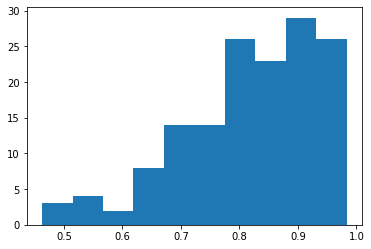

In [16]:
plt.hist(main_data["Social support"])

In [17]:
sl.loc[main_data["Social support"]<0.6]="low"
sl.loc[main_data["Social support"]>=0.6]="median"
sl.loc[main_data["Social support"]>=0.8]="high"
sl

0        high
1        high
2        high
3        high
4        high
        ...  
144    median
145    median
146       low
147    median
148       low
Name: Social support, Length: 149, dtype: object

In [18]:
classes=np.unique(np.array(sl))
classes

array(['high', 'low', 'median'], dtype=object)

In [ ]:
plt.figure(figsize=(12,10), dpi= 200)
plt.rcParams['font.size'] = '20'
for i in classes:
  xs = np.sqrt(ss[0][0])*pd.DataFrame(us[0][:, 0]).loc[sl==i, :][0]
  ys = np.sqrt(ss[0][1])*pd.DataFrame(us[0][:, 1]).loc[sl==i, :][0]
  sns.scatterplot(xs, ys, label = i)
plt.title("Data scatter at Z-scoring")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.savefig("PCAz.png")

In [ ]:
plt.figure(figsize=(12,10), dpi= 200)
plt.rcParams['font.size'] = '20'
for i in classes:
  xs = np.sqrt(ss[1][0])*pd.DataFrame(us[1][:, 0]).loc[sl==i, :][0]
  ys = np.sqrt(ss[1][1])*pd.DataFrame(us[1][:, 1]).loc[sl==i, :][0]
  sns.scatterplot(xs, ys, label = i)
plt.title("Data scatter at Range normalisation")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.savefig("PCArange.png")

In [21]:
cov=np.array(np.transpose(z_scoring))@np.array(z_scoring)/z_scoring.shape[0]
cov

array([[ 1.        ,  0.72325613,  0.48292977, -0.11494585, -0.20320698],
       [ 0.72325613,  1.        ,  0.46149387, -0.16175028, -0.36437353],
       [ 0.48292977,  0.46149387,  1.        ,  0.16943737, -0.40136297],
       [-0.11494585, -0.16175028,  0.16943737,  1.        , -0.16396173],
       [-0.20320698, -0.36437353, -0.40136297, -0.16396173,  1.        ]])

In [22]:
ei=np.linalg.eig(cov)
ei

(array([2.34822701, 1.22563721, 0.2453192 , 0.70251402, 0.47830256]),
 array([[ 0.53823303,  0.26645214,  0.66265032,  0.36110215, -0.26421253],
        [ 0.56282271,  0.24253636, -0.70134292,  0.00279707, -0.36402884],
        [ 0.49832131, -0.25759366, -0.10036766,  0.21232692,  0.79382932],
        [-0.00444589, -0.79882983, -0.07688565,  0.45364712, -0.38748423],
        [-0.38104056,  0.40705747, -0.23027721,  0.78658692,  0.13177907]]))

In [23]:
pc1=z_scoring@ei[1][:, np.argmax(ei[0])]/np.sqrt(z_scoring.shape[0]*np.max(ei[0]))
pc1

0      0.165285
1      0.168298
2      0.153625
3      0.122505
4      0.137797
         ...   
144   -0.118987
145   -0.033661
146    0.006587
147   -0.093171
148   -0.263087
Length: 149, dtype: float64

In [24]:
us[0][:, 0]

array([-0.16528466, -0.16829806, -0.15362527, -0.12250488, -0.13779727,
       -0.1638013 , -0.15633308, -0.12358765, -0.15855658, -0.12252819,
       -0.13239245, -0.06821572, -0.10582671, -0.13185362, -0.12833853,
       -0.07223163, -0.10960582, -0.05913261, -0.05465788, -0.06258509,
       -0.09741511, -0.06389734, -0.10158505, -0.04052218, -0.06656376,
       -0.05166212, -0.06369192, -0.01677311, -0.09039615, -0.02100271,
       -0.08646584, -0.18414257,  0.00748692, -0.02246194, -0.02383906,
       -0.02883077, -0.03238738, -0.02789859, -0.01651934, -0.09942028,
       -0.04576372, -0.09290898, -0.01590926, -0.05297546, -0.04935197,
       -0.00378926, -0.0325657 , -0.01524496, -0.0204237 , -0.04113434,
       -0.0115099 , -0.01948526, -0.0203541 , -0.03136885, -0.04192587,
       -0.07415337, -0.0355117 , -0.05595895, -0.01558471, -0.02054791,
       -0.01851949, -0.00776165, -0.00761749,  0.01585607,  0.00068738,
       -0.01745259, -0.03004354,  0.02386243, -0.00098091,  0.01

In [25]:
pc2=z_scoring@ei[1][:, 2]/np.sqrt(z_scoring.shape[0]*ei[0][2])
pc2

0      0.112021
1      0.091064
2      0.030612
3     -0.004010
4      0.043407
         ...   
144    0.234969
145    0.068202
146   -0.092095
147    0.088952
148   -0.095890
Length: 149, dtype: float64

In [26]:
us[0][:, 1]

array([-0.04260586, -0.09180811, -0.06376672, -0.05540932, -0.11937669,
       -0.10202976, -0.10734923, -0.03331074, -0.11842805, -0.04103847,
       -0.09205835,  0.02878801, -0.0342749 , -0.07189901, -0.06998043,
        0.06356077, -0.11380431,  0.12668236, -0.03050232,  0.07689691,
        0.06630101, -0.04430167, -0.05451184,  0.04840039, -0.070863  ,
        0.04838101,  0.0800962 ,  0.10180648,  0.06049652, -0.00267928,
        0.01938726, -0.08145152, -0.09029937,  0.11021852,  0.04057921,
        0.06449614,  0.07516743,  0.12218398,  0.04594823,  0.0140374 ,
        0.09390316, -0.17585043,  0.06194346,  0.07881404,  0.03596688,
        0.11601532,  0.03364692,  0.03332339,  0.00909642,  0.03304631,
        0.10792234,  0.07224143,  0.12858851, -0.08725892, -0.01644845,
        0.11862865,  0.10252581,  0.1313868 , -0.02946077,  0.11679249,
        0.00817709,  0.06783505,  0.08876472,  0.0161099 ,  0.06130248,
        0.06505496, -0.03466193,  0.18058939,  0.02536722, -0.00

In [ ]:
plt.figure( figsize=(12, 10), dpi=200)
for j in classes:
  sns.scatterplot(-pc1[sl==j], -pc2[sl==j], label=j)
plt.legend()
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("Conventional PCA at z-scoring")
plt.savefig("cPCA.png")

In [28]:
u, s, v = np.linalg.svd(rank)
u*=-1
v*=-1
v

array([[ 0.49250011,  0.42423802,  0.49965142,  0.22969291,  0.52445721],
       [-0.30338714, -0.48143506, -0.18525794,  0.14265267,  0.78835667],
       [ 0.22518899,  0.2736331 , -0.40797183, -0.78606324,  0.30013067],
       [-0.2185103 , -0.3134781 ,  0.73847382, -0.55555288, -0.00146295],
       [-0.75295621,  0.64428161,  0.06514105,  0.01889359,  0.11557611]])

In [32]:
alpha=1/sum(v[:, 0])
alpha

-1.7948019250803398

In [30]:
alpha*v[:,0]

array([-0.88394015,  0.54451982, -0.40416963,  0.39218271,  1.35140725])

In [31]:
 100*s[0]**2/np.sum(np.sum(rank**2))

92.51025223078327